<a href="https://colab.research.google.com/github/vickdurazzo/analises_exploratorias/blob/main/analise_duracao_filmes_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Da Duração dos Filmes ao Longo do Tempo**
Neste notebook será feito uma análise exploratória de um dataset disponibilizado pela Netflix e tentaremos responder as determinadas perguntas :
* Qual é a tendência da duração dos filmes ao longo do tempo ?
* A duração dos filme tem correlação ao gênero do mesmo ?


**Importando a biblioteca**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

**Ajsute para usar o matplotlib no colab**

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Carregando o dataset e imprimindo as 5 primeiras linhas**

In [4]:
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


**Selecionando apenas as colunas necessárias e filtrando apenas os filmes**

In [6]:
netflix_df = netflix_df[netflix_df.type=='Movie']
netflix_df = netflix_df[['title','country','genre','release_year','duration']]
netflix_df.head(5)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


**Gerando um gráfico a partir dos dados**

Text(0.5, 1.0, 'Duração dos Filmes X Ano de Lançamento')

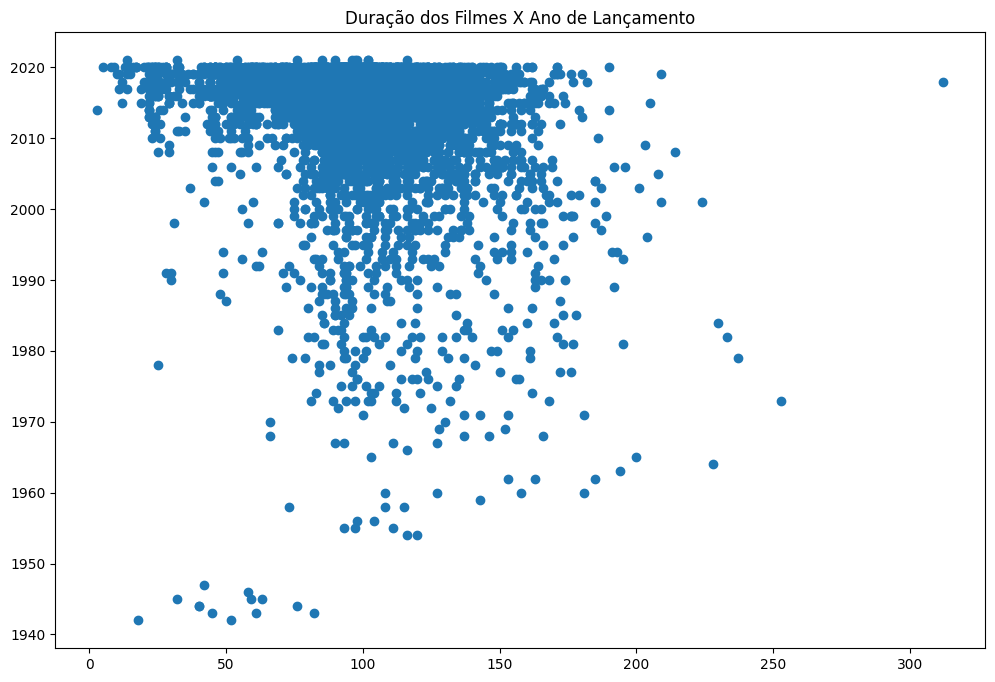

In [9]:
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_df['duration'],netflix_df['release_year'])
plt.title("Duração dos Filmes X Ano de Lançamento")
plt.show()

No gráfico conseguimos observar que apesar de termos na plataforma filmes lançados mais recentemente, nos últimos anos foram lançados muitos curtas-metragens.
Também é possivel observar que muitos filmes desse Dataframe tem menos de 1 hora de duração, iremos agora verificar o gênero desses filmes que estão puxando a média para baixo 

In [11]:
netflix_df[netflix_df.duration < 60].head(30)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Neste Dataframe podemos observar que os filmes com menos de 1 hora são compostos por generos como infantil, documentario ou Stand-Up. O que torna até lógico a duração deles serem menos de 1 hora.

Temos algumas formas de lidar com essa questão, poderiamos simplesmente eliminar essas linhas do Dataframe, mas pelo intuito didático iremos explorar a técnica de plotarmos esses dados, mas definindo cores para cada gênero

**Defindo um array com as cores para cada filme**

In [17]:
colors = []

for genre in netflix_df.genre : 
  if genre == 'Children' :
    colors.append('pink')
  elif genre == 'Documentaries' :
    colors.append('gray')
  elif genre == 'Stand-Up' :
    colors.append('yellow')
  else:
    colors.append('blue')


**Plotando gráfico**

Text(0.5, 1.0, 'Duração Filme X Ano de Lançamento')

Text(0.5, 0, 'Ano de Lançamento')

Text(0, 0.5, 'Duração (min)')

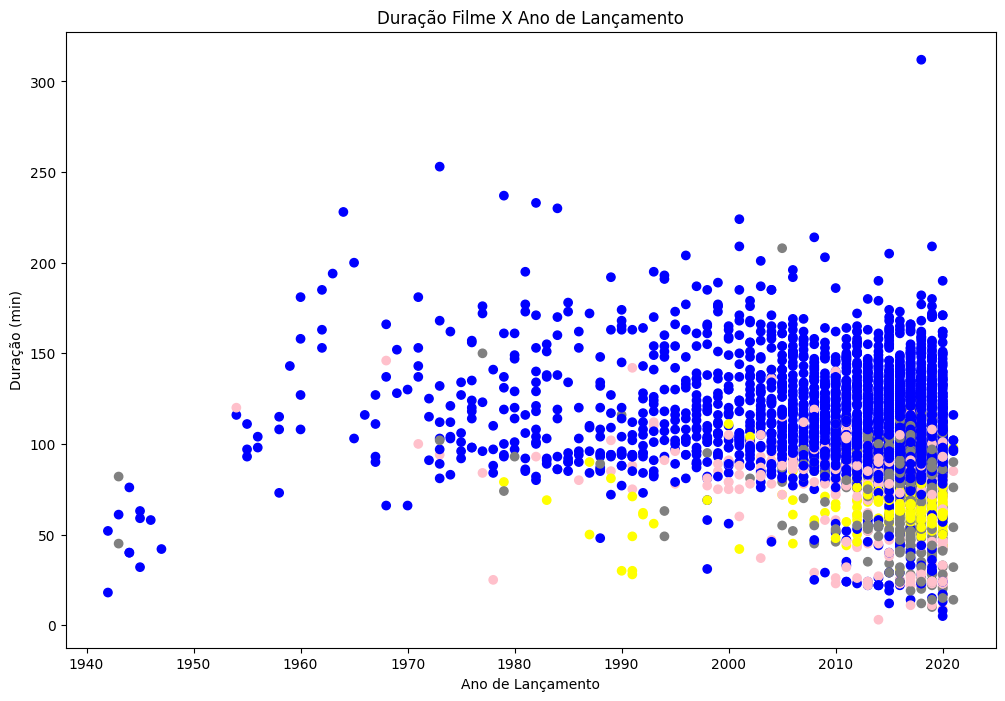

In [18]:
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_df['release_year'],netflix_df['duration'],color=colors)

plt.title("Duração Filme X Ano de Lançamento")
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (min)')

plt.show()

Com esta análise exploratória podemos concluir que o gênero do filme possui sim correlação com sua duração e que não é possível termos a certeza que os filmes tem a tendência de se tornarem mais curtos ao longo do tempo